In [281]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
%matplotlib inline

In [282]:
df = pd.read_csv("AirlineReviews.csv", encoding="UTF-8")

In [283]:
print(df['airline_sentiment'] == "positive")

0        False
1         True
2        False
3        False
4        False
         ...  
14635     True
14636    False
14637    False
14638    False
14639    False
Name: airline_sentiment, Length: 14640, dtype: bool


In [284]:
def quantify_sentiment(col):
    if col == "positive":
        return 1.0
    elif col == "negative":
        return 0.0
    else:
        return 0.5

In [285]:
df['airline_sentiment'] = df['airline_sentiment'].apply(quantify_sentiment)

In [286]:
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,0.5,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,1.0,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,0.5,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,0.0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,0.0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,681679794,False,finalized,3,2/25/15 19:46,1.0,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/15 12:01,5.695880e+17,NaN,NaN
14636,681679795,False,finalized,3,2/25/15 19:14,0.0,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/15 11:59,5.695870e+17,Texas,NaN
14637,681679796,False,finalized,3,2/25/15 19:04,0.5,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/15 11:59,5.695870e+17,"Nigeria,lagos",NaN
14638,681679797,False,finalized,3,2/25/15 18:59,0.0,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/15 11:59,5.695870e+17,New Jersey,Eastern Time (US & Canada)


In [287]:
df = df[['text', 'airline_sentiment']]

In [288]:
df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,0.5
1,@VirginAmerica plus you've added commercials t...,1.0
2,@VirginAmerica I didn't today... Must mean I n...,0.5
3,@VirginAmerica it's really aggressive to blast...,0.0
4,@VirginAmerica and it's a really big bad thing...,0.0
...,...,...
14635,@AmericanAir thank you we got on a different f...,1.0
14636,@AmericanAir leaving over 20 minutes Late Flig...,0.0
14637,@AmericanAir Please bring American Airlines to...,0.5
14638,"@AmericanAir you have my money, you change my ...",0.0


In [289]:
def remove_usernames(col):
            string = col
            usernames = re.findall("@\w+", col)
            for username in usernames:
                string = col.replace(username, "")
            
            return string

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\smeye\AppData\Local\Temp\ipykernel_14692\3651988153.py:3: SyntaxWarning: invalid escape sequence '\w'
  usernames = re.findall("@\w+", col)


In [290]:
df2 = pd.read_csv("HotelReviews.csv")

In [291]:
df2

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35907,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC
35908,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC
35909,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC
35910,3747 29th St S E,"Hotels-Apartment,Corporate Lodging,Hotels,Lodging",Grand Rapids,US,42.909480,-85.573590,Extended Stay America Grand Rapids - Kentwood,49512,MI,NaN,2015-12-01T19:40:54Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,NaN,NaN,write a review,NaN


In [292]:
is_string_dtype(df2['reviews.text'])

False

In [293]:
df2.dtypes

address                  object
categories               object
city                     object
country                  object
latitude                float64
longitude               float64
name                     object
postalCode               object
province                 object
reviews.date             object
reviews.dateAdded        object
reviews.doRecommend     float64
reviews.id              float64
reviews.rating          float64
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.username         object
reviews.userProvince     object
dtype: object

In [294]:
import re

In [295]:
txt = "@VirginAmerica Is the @worst I swear!!"
re.findall(r"@\w+",txt)

['@VirginAmerica', '@worst']

In [296]:
def remove_usernames(col):
    string = col
    usernames = re.findall(r"(@\w+|#\w+)", string)
    print(usernames)
    for username in usernames:
        string = string.replace(username, "")
    
    return string

In [297]:
df['text'] = df['text'].apply(remove_usernames)

['@VirginAmerica', '@dhepburn']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@virginamerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica', '@Australia']
['@VirginAmerica', '@virginmedia', '#fabulous', '#Seductive', '#stress']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica', '#29DaysToGo']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica', '#fail']
['@VirginAmerica']
['@VirginAmerica', '#VX358', '#noair', '#worstflightever', '#roasted', '#SFOtoBOS']
['@VirginAmerica', '#sendambien', '#andchexmix']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica', '@Pacificbiznews']
['@VirginAmerica', '#MoodlitMonday', '#ScienceBehindTheExperience']
['@VirginAmerica', '#MoodlitMonday']
['@VirginAm

C:\Users\smeye\AppData\Local\Temp\ipykernel_14692\746752117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_usernames)


In [298]:
df

,text,airline_sentiment
0,What said.,0.5
1,plus you've added commercials to the experien...,1.0
2,I didn't today... Must mean I need to take an...,0.5
3,"it's really aggressive to blast obnoxious ""en...",0.0
4,and it's a really big bad thing about it,0.0
...,...,...
14635,thank you we got on a different flight to Chi...,1.0
14636,leaving over 20 minutes Late Flight. No warni...,0.0
14637,Please bring American Airlines to,0.5
14638,"you have my money, you change my flight, and ...",0.0


In [299]:
df['text'] = df['text'].apply(remove_usernames)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

C:\Users\smeye\AppData\Local\Temp\ipykernel_14692\746752117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_usernames)


In [300]:
class Model:
    DATASETS = ["SocialMedia", "AmazonReviews", "TechProductReviews", "AirlineReviews", "DrugReviews", "HotelReviews", "MovieReviews", "News"]
    datasetChoice = ""
    MODEL_TYPES = ["LogisticRegression", "SupportVectorMachine", "RandomForest", "KMeansClustering"]
    modelType = ""
    df = pd.DataFrame()

    #Constructor
    def __init__(self, datasetChoice, modelType):
        self.datasetChoice = datasetChoice
        self.modelType = modelType
        self.df = pd.read_csv(f"{datasetChoice}.csv")
        print(self.df.head())

    def get_df(self):
        return self.df

    #Generate model based on type of model chosen and dataset chosen
    #def generateModel(self):

    #Get info for the current dataset
    #def getDatasetInfo(self):
        
    def autoCleaner(self, textColumn, sentimentColumn, posLabel = "positive", negLabel = "negative"):
        self.df = self.df[[textColumn, sentimentColumn]]

        #Quanitify sentiment data
        # def quantify_sentiment(a_col):
        #     if a_col == posLabel:
        #         return 1.0
        #     elif a_col == negLabel:
        #         return 0.0
        #     else:
        #         return 0.5
        
        #Transform ratings into the correct format (0.0-1.0)
        #def transform_numeric_ratings(a_col):
            
            
        #Is sentimentColumn already comprised of numbers? If not, change that!
        # if not is_numeric_dtype(self.df[sentimentColumn]):
        #     self.df[sentimentColumn] = self.df[sentimentColumn].apply(quantify_sentiment)
        
        #Remove Usernames with @ from the text data 
        def clean_text(a_col):
            string = a_col
            usernamesAndHashtags = re.findall(r"(@\w+|#\w+)", a_col)
            for uAndH in usernamesAndHashtags:
                string = string.replace(uAndH, "")

            for word in string:
                if not word.isalnum():
                    word = re.sub(r'[\W_]+', "", word)
            
            return string
        
        self.df[textColumn] = self.df[textColumn].apply(clean_text)
        print(self.df.head())
        print(self.df.tail())

            

        
model = Model("AirlineReviews", "LogisticRegression")
model.autoCleaner("text", "airline_sentiment")

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  681448150    False   finalized                   3      2/25/15 5:24   
1  681448153    False   finalized                   3      2/25/15 1:53   
2  681448156    False   finalized                   3     2/25/15 10:01   
3  681448158    False   finalized                   3      2/25/15 3:05   
4  681448159    False   finalized                   3      2/25/15 5:50   

  airline_sentiment  airline_sentiment:confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativereason:confidence         airline airline_sentiment_gold  \
0                        NaN  Virgin America                    NaN  

<Axes: xlabel='airline_sentiment', ylabel='count'>

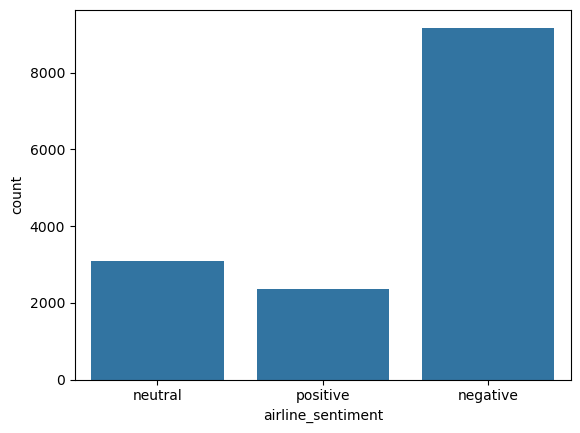

In [301]:
sns.countplot(x='airline_sentiment',data=model.df)

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [303]:
x = model.df["text"]
y = model.df["airline_sentiment"]

In [304]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [305]:
vectorizer=CountVectorizer()
x_train_vec=vectorizer.fit_transform(x_train)
x_test_vec=vectorizer.transform(x_test)
LRModel = LogisticRegression()
LRModel.fit(x_train_vec,y_train)

LogisticRegression()

In [306]:
model.df.drop(model.df[model.df.airline_sentiment == 0.5].index)

,text,airline_sentiment
0,What said.,neutral
1,plus you've added commercials to the experien...,positive
2,I didn't today... Must mean I need to take an...,neutral
3,"it's really aggressive to blast obnoxious ""en...",negative
4,and it's a really big bad thing about it,negative
...,...,...
14635,thank you we got on a different flight to Chi...,positive
14636,leaving over 20 minutes Late Flight. No warni...,negative
14637,Please bring American Airlines to,neutral
14638,"you have my money, you change my flight, and ...",negative


In [307]:
model.df

,text,airline_sentiment
0,What said.,neutral
1,plus you've added commercials to the experien...,positive
2,I didn't today... Must mean I need to take an...,neutral
3,"it's really aggressive to blast obnoxious ""en...",negative
4,and it's a really big bad thing about it,negative
...,...,...
14635,thank you we got on a different flight to Chi...,positive
14636,leaving over 20 minutes Late Flight. No warni...,negative
14637,Please bring American Airlines to,neutral
14638,"you have my money, you change my flight, and ...",negative


In [308]:
y_pred = LRModel.predict(x_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy", accuracy)

accuracy 0.7907559198542805


In [309]:
Report=classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      2750
     neutral       0.62      0.60      0.61       918
    positive       0.74      0.68      0.71       724

    accuracy                           0.79      4392
   macro avg       0.74      0.72      0.73      4392
weighted avg       0.79      0.79      0.79      4392



In [310]:
new_review = ["I hate this airline! They killed my whole family!"]
new_review_vec=vectorizer.transform(new_review)
pred_sentiment=LRModel.predict(new_review_vec)
print("Predicted sentiment",pred_sentiment)

Predicted sentiment ['negative']


In [311]:
new_review = ["I am fine with this airline"]
new_review_vec=vectorizer.transform(new_review)
pred_sentiment=LRModel.predict(new_review_vec)
print("Predicted sentiment",pred_sentiment)

Predicted sentiment ['positive']


In [312]:
new_review = ["I am"]
new_review_vec=vectorizer.transform(new_review)
pred_sentiment=LRModel.predict(new_review_vec)
print("Predicted sentiment",pred_sentiment)

Predicted sentiment ['neutral']


In [313]:
from sklearn.metrics import confusion_matrix

In [314]:

confusion_matrix(y_test,y_pred)

array([[2426,  235,   89],
       [ 279,  552,   87],
       [ 131,   98,  495]], dtype=int64)

<Axes: >

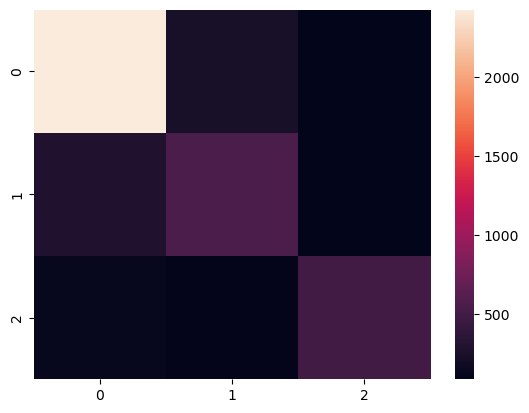

In [315]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [316]:
new_review = ["This is an airline"]
new_review_vec=vectorizer.transform(new_review)
pred_sentiment=LRModel.predict(new_review_vec)
print("Predicted sentiment",pred_sentiment)

Predicted sentiment ['negative']
